In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
print("Downloading dataset via kagglehub...")
path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

print("Path to dataset files:", path)

csv_path = os.path.join(path, "survey.csv")
df = pd.read_csv(csv_path)

print("Data Loaded Successfully!")

Using Colab cache for faster access to the 'mental-health-in-tech-survey' dataset.
Path to dataset files: /kaggle/input/mental-health-in-tech-survey
Data Loaded Successfully!


In [ ]:
# --- 1. Clean Gender ---
def clean_gender(gender):
    g = str(gender).lower().strip()
    if g in ['male', 'm', 'male-ish', 'maile', 'cis male', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'cis man']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'femake', 'female ', 'cis female', 'cis-female/femme', 'female (cis)', 'femail']:
        return 'Female'
    else:
        return 'Other'

df['Gender_Cleaned'] = df['Gender'].apply(clean_gender)

# --- 2. Clean Age ---
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# --- 3. Handle Nulls ---
df['self_employed'] = df['self_employed'].fillna('No')
df['work_interfere'] = df['work_interfere'].fillna('Unknown')

# Set global style for charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 5)

print("Data Cleaned! Starting Visualizations...")

Data Cleaned! Starting Visualizations...


/tmp/ipython-input-1771803449.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender_Cleaned', data=df, ax=axes[1], palette='pastel')
/tmp/ipython-input-1771803449.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=df[df['Country'].isin(top_countries)], ax=axes[3], palette='magma')


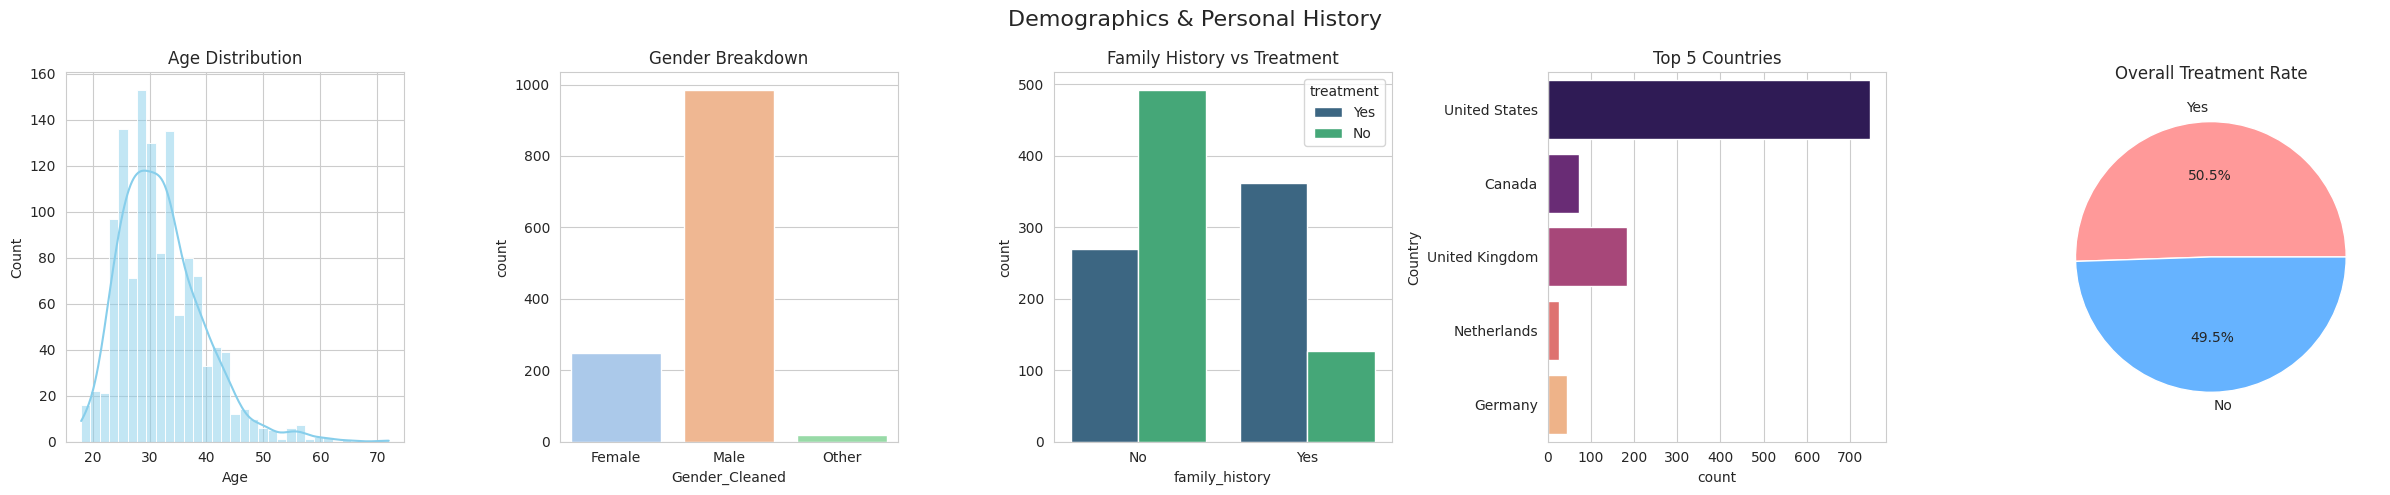

In [ ]:
#Jennifer Garcia
#DEMOGRAPHICS & HISTORY
fig, axes = plt.subplots(1, 5, figsize=(24, 5))
fig.suptitle('Demographics & Personal History', fontsize=16)

# 1. Age Dist
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# 2. Gender Count
sns.countplot(x='Gender_Cleaned', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Gender Breakdown')

# 3. Family History
sns.countplot(x='family_history', hue='treatment', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Family History vs Treatment')

# 4. Top Countries
top_countries = df['Country'].value_counts().iloc[:5].index
sns.countplot(y='Country', data=df[df['Country'].isin(top_countries)], ax=axes[3], palette='magma')
axes[3].set_title('Top 5 Countries')

# 5. Overall Treatment Rate
treatment_counts = df['treatment'].value_counts()
axes[4].pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[4].set_title('Overall Treatment Rate')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3350200019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_employees', data=df, order=order_size, ax=axes[0], palette='coolwarm')
/tmp/ipython-input-3350200019.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='benefits', data=df, ax=axes[1], palette='Set2')
/tmp/ipython-input-3350200019.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anonymity', data=df, ax=axes[4], palette='autumn')


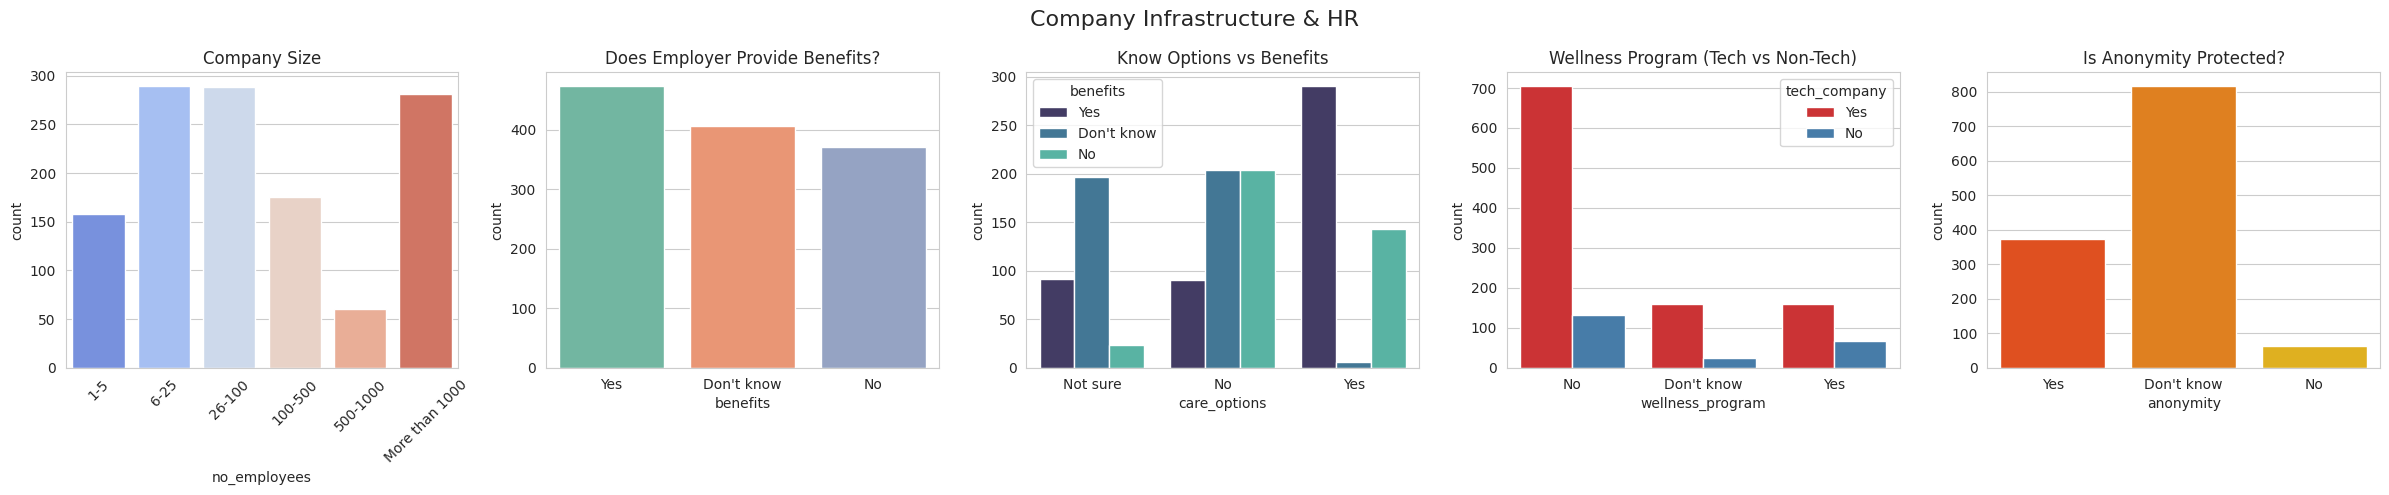

In [ ]:
# NAME
fig, axes = plt.subplots(1, 5, figsize=(24, 5))
fig.suptitle('Company Infrastructure & HR', fontsize=16)

# 1. Company Size
order_size = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
sns.countplot(x='no_employees', data=df, order=order_size, ax=axes[0], palette='coolwarm')
axes[0].set_title('Company Size')
axes[0].tick_params(axis='x', rotation=45)

# 2. Benefits
sns.countplot(x='benefits', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Does Employer Provide Benefits?')

# 3. Knowledge of Care
sns.countplot(x='care_options', hue='benefits', data=df, ax=axes[2], palette='mako')
axes[2].set_title('Know Options vs Benefits')

# 4. Wellness Program
sns.countplot(x='wellness_program', hue='tech_company', data=df, ax=axes[3], palette='Set1')
axes[3].set_title('Wellness Program (Tech vs Non-Tech)')

# 5. Anonymity
sns.countplot(x='anonymity', data=df, ax=axes[4], palette='autumn')
axes[4].set_title('Is Anonymity Protected?')

plt.tight_layout()
plt.show()

/tmp/ipython-input-613673413.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coworkers', data=df, ax=axes[1], palette='Reds')
/tmp/ipython-input-613673413.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mental_vs_physical', data=df, ax=axes[2], palette='Purples')
/tmp/ipython-input-613673413.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mental_health_consequence', data=df, ax=axes[3], palette='Oranges')
/tmp/ipython-input-613673413.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

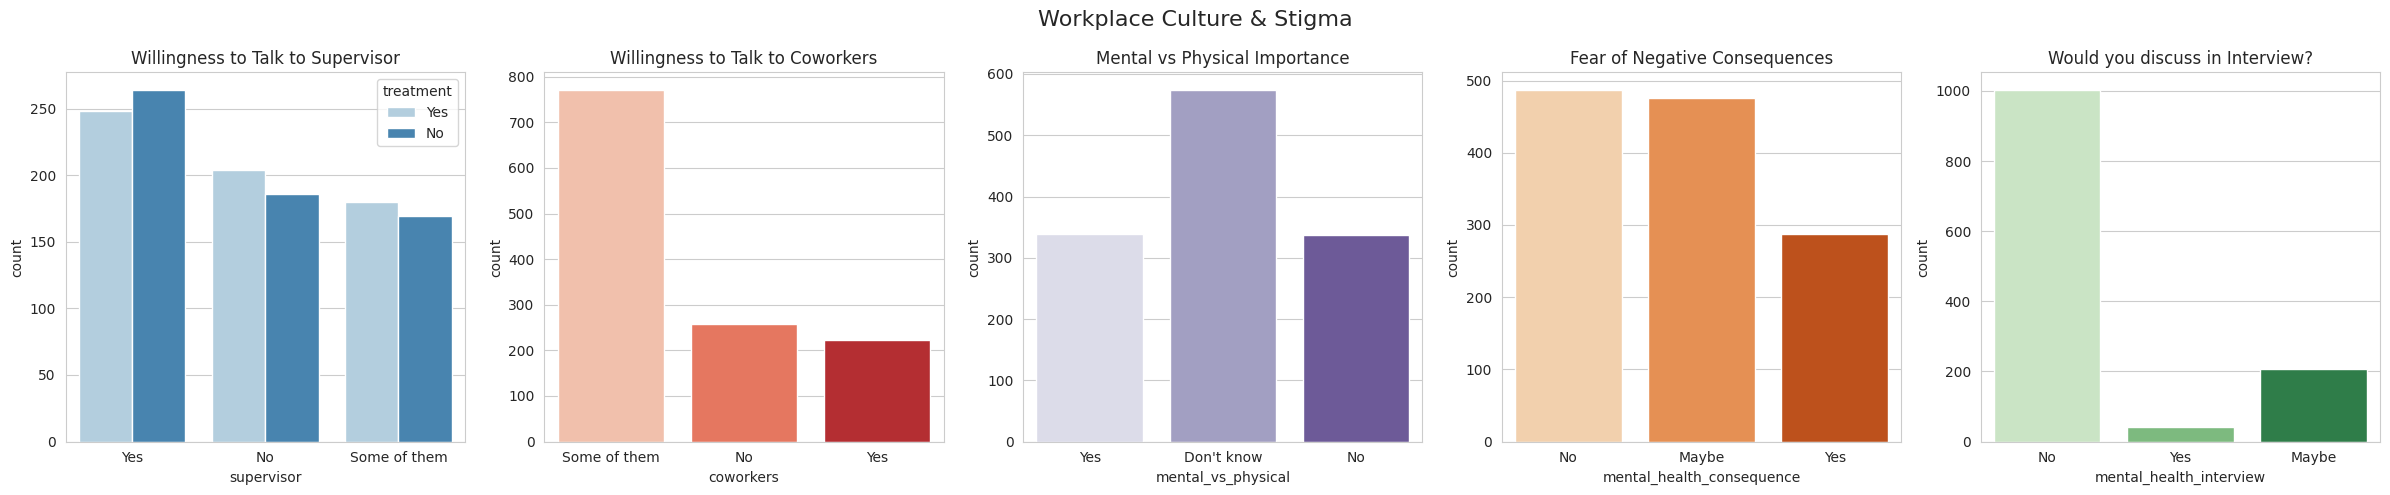

In [ ]:
#RAFAELA HOLLANDA

fig, axes = plt.subplots(1, 5, figsize=(24, 5))
fig.suptitle('Workplace Culture & Stigma', fontsize=16)

# 1. Talk to Supervisor
sns.countplot(x='supervisor', hue='treatment', data=df, ax=axes[0], palette='Blues')
axes[0].set_title('Willingness to Talk to Supervisor')

# 2. Talk to Coworkers
sns.countplot(x='coworkers', data=df, ax=axes[1], palette='Reds')
axes[1].set_title('Willingness to Talk to Coworkers')

# 3. Mental vs Physical
sns.countplot(x='mental_vs_physical', data=df, ax=axes[2], palette='Purples')
axes[2].set_title('Mental vs Physical Importance')

# 4. Consequences
sns.countplot(x='mental_health_consequence', data=df, ax=axes[3], palette='Oranges')
axes[3].set_title('Fear of Negative Consequences')

# 5. Interview Discussion
sns.countplot(x='mental_health_interview', data=df, ax=axes[4], palette='Greens')
axes[4].set_title('Would you discuss in Interview?')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2934704459.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='leave', data=df, ax=axes[2], palette='winter')
/tmp/ipython-input-2934704459.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='self_employed', data=df, ax=axes[4], palette='bone')


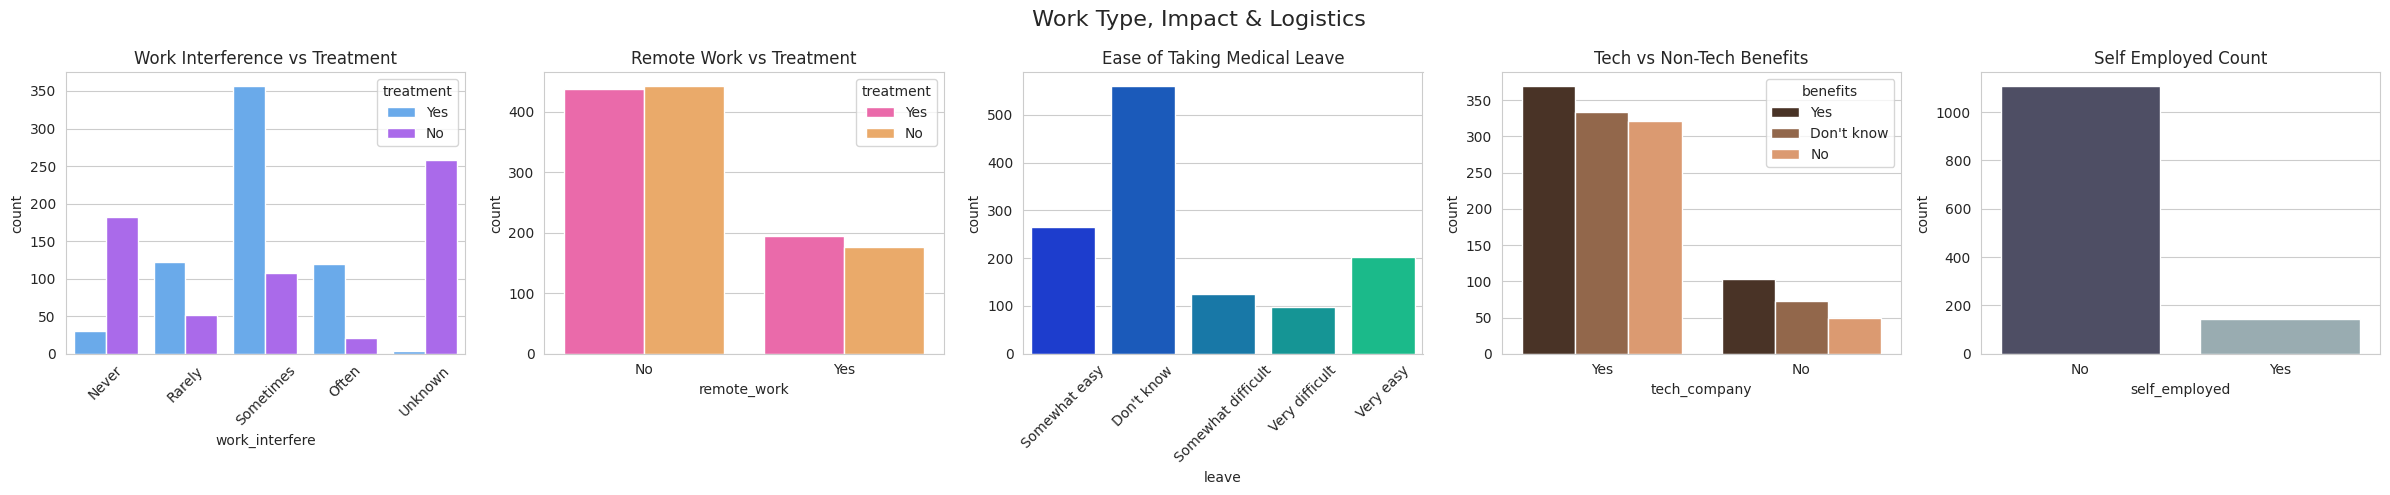

In [ ]:
# NAME
fig, axes = plt.subplots(1, 5, figsize=(24, 5))
fig.suptitle(' Work Type, Impact & Logistics', fontsize=16)

# 1. Work Interference
order_interfere = ['Never', 'Rarely', 'Sometimes', 'Often', 'Unknown']
sns.countplot(x='work_interfere', hue='treatment', data=df, order=order_interfere, ax=axes[0], palette='cool')
axes[0].set_title('Work Interference vs Treatment')
axes[0].tick_params(axis='x', rotation=45)

# 2. Remote Work
sns.countplot(x='remote_work', hue='treatment', data=df, ax=axes[1], palette='spring')
axes[1].set_title('Remote Work vs Treatment')

# 3. Ease of Leave
sns.countplot(x='leave', data=df, ax=axes[2], palette='winter')
axes[2].set_title('Ease of Taking Medical Leave')
axes[2].tick_params(axis='x', rotation=45)

# 4. Tech vs Non-Tech Benefits
sns.countplot(x='tech_company', hue='benefits', data=df, ax=axes[3], palette='copper')
axes[3].set_title('Tech vs Non-Tech Benefits')

# 5. Self Employed
sns.countplot(x='self_employed', data=df, ax=axes[4], palette='bone')
axes[4].set_title('Self Employed Count')

plt.tight_layout()
plt.show()

In [ ]:
#MACHINE LEARNING

# 1. Feature Selection
features = ['Age', 'Gender_Cleaned', 'family_history', 'work_interfere',
            'remote_work', 'tech_company', 'benefits', 'care_options', 'anonymity', 'leave']
target = 'treatment'

# Create ML Dataframe
df_ml = df[features + [target]].copy()

# 2. Label Encoding (Converting Words to Numbers)
le = LabelEncoder()
for col in df_ml.columns:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))

# 3. Train/Test Split (Following Professor's Pattern)
X = df_ml.drop(target, axis=1)
y = df_ml[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split: 80% Training, 20% Testing")

# --- MODEL 1: LOGISTIC REGRESSION ---
# Name
print("\nRunning Model 1: Logistic Regression...")
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, preds_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")

# --- MODEL 2: DECISION TREE ---
# Name
print("\nRunning Model 2: Decision Tree...")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
preds_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, preds_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")

# --- MODEL 3: RANDOM FOREST ---
# Name
print("\nRunning Model 3: Random Forest...")
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, preds_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# --- FEATURE IMPORTANCE (For your Presentation/Insights) ---
# Name
print("\n--- KEY INSIGHT: WHAT FACTORS MATTER MOST? ---")
importances = pd.Series(model_rf.feature_importances_, index=features).sort_values(ascending=False)
print(importances)

Data Split: 80% Training, 20% Testing

Running Model 1: Logistic Regression...
Logistic Regression Accuracy: 0.67

Running Model 2: Decision Tree...
Decision Tree Accuracy: 0.70

Running Model 3: Random Forest...
Random Forest Accuracy: 0.79

--- KEY INSIGHT: WHAT FACTORS MATTER MOST? ---
work_interfere    0.383566
Age               0.189994
family_history    0.094451
care_options      0.074289
leave             0.072988
benefits          0.057364
anonymity         0.036236
Gender_Cleaned    0.034331
remote_work       0.033665
tech_company      0.023116
dtype: float64
